
# Maximum Likelyhood Estimation

by Emil Vassev

October 3, 2022
<br><br>
Copyright (C) 2022 - All rights reserved, do not copy or distribute without permission of the author.
***

## Getting Familiar with Maximum Likelyhood Estimation
Machine learning algorithms are defined in a *pattern-specific* or in a *distribution-specific* manner. Examples of *pattern-specific* ML algorithms are:
* Logistic Regression - a ML algorithm designed specifically for *binary classification* problems;
* Linear Regression - a ML learning algorithm designed for data that is linearly distributed in a single- or multi-dimensional space. 

**Maximum Likelihood Estimation is about ML defined in a *distribution-specific* manner**:
* the term likelihood can be defined as a **concept that when working with a probabilistic model with unknown parameters, the parameters which make the data have the highest probability are the most likely ones**
* the parameters with the highest possibility to generate the observed data
* a likelihood function is the **joint probability function of the data distribution**
* a maximum likelihood function is the optimized likelihood function provided with most-likely parameters.

Maximum Likelihood Estimation is a *probabilistic approach* that can be applied to data following one of the following distirbutine models:
* Normal
* Poisson
* Bernoulli
* etc.

With prior assumption or knowledge about the data distribution, Maximum Likelihood Estimation helps us to find *the most likely-to-occur distribution parameters*. Hence, this method is an optimization algorithm that searches for the most suitable parameters. Since we know the data distribution a priori, the algorithm attempts iteratively to find its pattern. Maximum Likelihood Estimation can be applied to both regression and classification problems.  

### Maximum Likelihood PrincipleBayesian Inference for fixed dat

**Recall**
* Likelihood Theory - a part of the Bayesian Inference mechanism that outlines how data is used by the distribution model of the data;
* Fisher principle: the amount of information that an observable random variable $X (X≡data)$ carries about an unknown parameter $θ∈Θ$ of a distribution that models $X$
* Bayesian Inference for fixed data 
<pre>
    P(Θ|X) ∼ P(X|Θ) * P(Θ)
	Posterior ∼ Likelihood × Prior
</pre>   

**Maximum Likelihood Estimator** 
* aims to maximize the probability of every value point of $X$ occurring given a set of probability distribution parameters $Θ$
* estimates the likelihood $P(X|Θ$) - random sample $X={X_{1},X_{2},…,X_{n}}$ with assumed probability distribution $P(X)$ that depends on some unknown parameter $θ$
* finds linear predictor $η(X_{1},X_{2},…,X_{n})$ such that $𝜂(X_{1},X_{2},…,X_{n})$ is an estimate of $θ$ with maximum $P(X)$  where $(X_{1},X_{2},…,X_{n})$ are the observed values of the random sample:    
    * defines $𝑓(𝑥_{𝑖};θ)$ − the probability density (or mass) function of each  $𝑋_{𝑖}$
    * the likelihood function $𝐋(𝜽)$ is the joint probability:  
<div>
 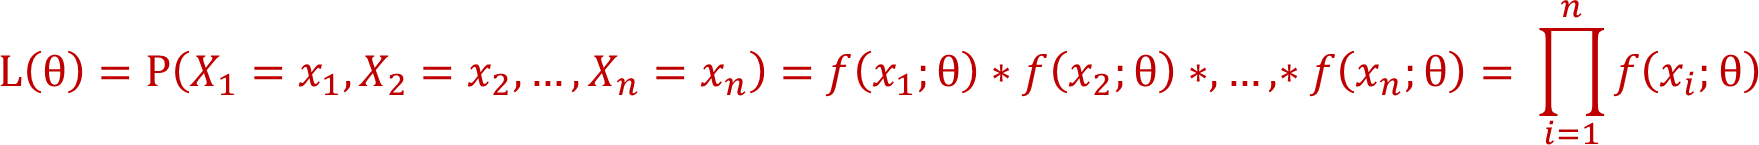
</div>

* objective: consider the likelihood function $L(θ)$ as a function of $θ$, and find the value of θ that maximizes it
<pre>
   argmax(L(θ))                                
</pre>

### Example

Suppose that we have a distribution model with parameters $θ$ and a collection of data examples $X$. In this example, we can consider that:
* $θ$ is a single value representing the probability that a coin comes up heads when flipped;
* $X$ is a sequence of independent coin flips. 

Objective: find the most likely value for the parameters $θ$ of our model, so:
<br>
$\hat{𝜃}=argmax(P(X|θ))$
<br>

* the probability of getting a tails is $1-θ$
* the observed data $X$ is a sequence with $n_{H}$ heads and $n_{T}$ tails
* the likelyhood function is the joint probability, i.e., $L(θ) = \prod_{n_{H}}θ * \prod_{n_{T}}1-θ = θ^{n_{H}}*(1-θ)^{n_{T}}$

Here, if we flip the coin 14 times and get the sequence “HHHTHTTHHHHHTT”:
* $n_{H}=9$
* $n_{T}=5$
* $L(θ) = P(X|θ) = θ^{9}*(1-θ)^{5}$



We use PyTorch and matplotlib to calculate and visualize the likelihood function. 

In [1]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

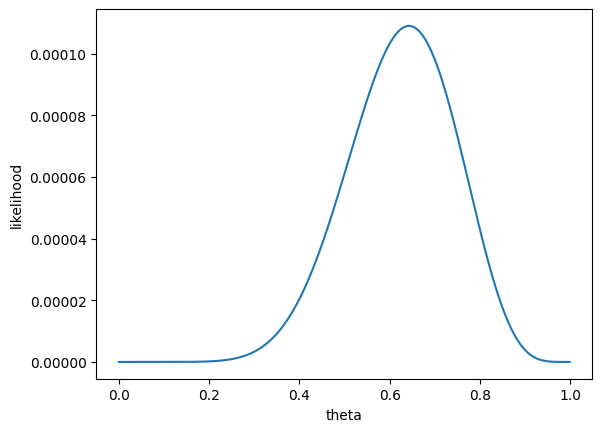

In [2]:
import torch
from matplotlib import pyplot as plt

# define an 1-D tensor, which is the theta space
theta = torch.arange(0, 1, 0.001)
# calculate the joint probability
p = theta**9 * (1 - theta)**5.

plt.xlabel('theta')
plt.ylabel('likelihood')
plt.plot(theta, p)

From the diagram we can conclude that the maximum value $argmax(P(X|θ))$ is near the expected one for an estimation of $\hat{𝜃}=9/14 ∼ 0.64$.  

Notice that at the maximum, the gradient of the function is flat. Thus, we could find the maximum likelihood estimate by finding the values of $θ$ where the derivative is zero, and finding the one that gives the highest probability.
<br><br>
Here, we calculate:
<br>
$0 = d[P(X|θ)]/dθ = d[θ^{9}*(1-θ)^{5}]/dθ = 9*θ^{8}*(1-θ)^{5} - 5*θ^{9}*(1-θ)^{4} = θ^{8}*(1-θ)^{4}*(9-14*θ)$
<br><br>
The equation has three solutions: 0, 1 and 9/14. The first two are clearly minima, not maxima as they assign probability 0 to our sequence. Here 9/14 must be the Maximum Likelihood Estimate $\hat{𝜃}=9/14 ∼ 0.64$.

## Finding Distribution Model
When we deal with real-life scenarios, often we don't know the distribution model of our data. Threfore, in order to apply the Maximum Likelyhood Estimation technique, we need to find out the distribution model first. 

### Fitter Library
Here, we can use the **Fitter** library developed by Thomas Cokelaer. This library uses *Scipy* library in the backend for distribution fitting and supports various distribution models.

We import the **Fitter** library.

In [3]:
from fitter import Fitter, get_common_distributions, get_distributions

We will find the distribution model of one of our real-life data. Our target is the distribution model of the *profit* data from the "50 startup companies" dataset. 

In [4]:
import pandas as pd
df = pd.read_csv('data\\50_startups.csv')
df.head(10)

,R_D_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


We prepare the data for fitting.

In [5]:
profit = df["Profit"].values

The next step is to start fitting different distributions and finding out the best-suited distribution for the data.

The steps are:
1. Create a Fitter instance by calling the *Fitter()* constructor.
2. Supply the data (profit) and distributions list if you have a basic idea of the distributions that might fit your data
3. Apply the *fit()* method
4. Generate the fitted distribution summary using *summary()* method

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,8.159470e-09,2478.623445,2484.359514,inf,0.085320,0.829656
gamma,8.159791e-09,2478.581037,2484.317106,inf,0.085435,0.828471
norm,8.163438e-09,2476.244048,2480.068094,inf,0.086995,0.812114
beta,8.199533e-09,2473.161459,2480.809551,inf,0.089227,0.787864
burr,9.543249e-09,2534.440548,2542.088640,inf,0.228592,0.008868


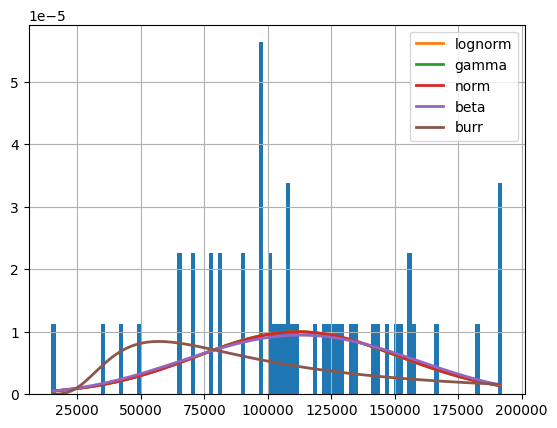

In [6]:
f = Fitter(profit,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

Here, we have fitted *gamma*, *lognormal*, *beta*, *burr*, and *normal* distributions.

By calling the *summary()* method on the fitted object, we show the different distributions and fit statistics such as *sumsquare_error*, *Akaike information criterion (aic)*, and *Bayesian information criterion (bic)* values. By default, the summary function ranks the best five distributions based on the *sumsquare_error* values in ascending order. Additionally, it provides an illustration of different distributions fitted over a histogram.

We can see that the *gamma* distribution is the best fit based on the sumsquare_error criteria. We can also retrieve the best distribution using the *get_best()* method where we can also supply the method for selecting the best distribution.  

In [7]:
f.get_best()

{'lognorm': {'s': 0.008397832299458716,
  'loc': -4639284.301130282,
  'scale': 4751129.404413113}}

In [8]:
f.get_best(method = 'sumsquare_error')

{'lognorm': {'s': 0.008397832299458716,
  'loc': -4639284.301130282,
  'scale': 4751129.404413113}}

It also prints out the optimized parameters of the gamma distribution, i.e.,  shape, location and scale parameters:
* shape parameter (a) = 7502.887233227051
* location parameter (loc) = -3344308.6184062166
* scale parameter (scale) = 460.66516754641816

If we have no initial idea about the distribution which might fit our data in, then we can call the *Fitter()* and supply the data (profit) only.

The Fitter class in the backend uses the *Scipy* library which supports 109 distributions and the *Fitter* class will scan all of them, call the fit function for you, ignoring those that fail or run forever and finally give you a summary of the best distributions in the sense of sum of the squared errors.

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
dgamma,7.938682e-09,2495.127520,2500.863589,inf,0.100827,0.652405
dweibull,7.997782e-09,2488.603350,2494.339419,inf,0.105144,0.600860
laplace_asymmetric,7.999797e-09,2504.507448,2510.243517,inf,0.067723,0.964015
loglaplace,8.028958e-09,2514.034803,2519.770872,inf,0.080998,0.871834
laplace,8.055028e-09,2497.519513,2501.343559,inf,0.089638,0.783300


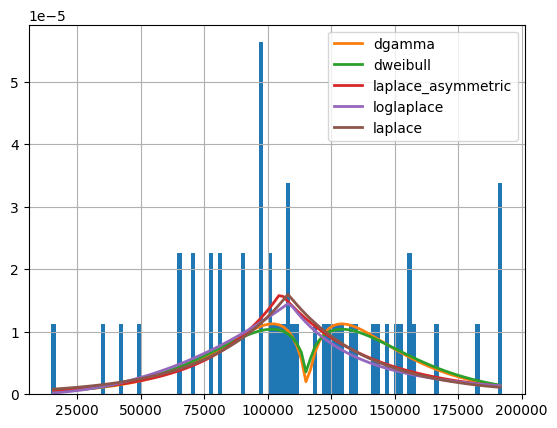

In [9]:
f = Fitter(profit)

f.fit()
f.summary()

In [10]:
f.get_best(method = 'sumsquare_error')

{'dgamma': {'a': 1.7317596927758612,
  'loc': 115504.76765253476,
  'scale': 18557.084123261993}}

Here, our new best fitting distribution model is the *dgamma* distribution with parameters:
* shape parameter (a) = 1.7317596927758612
* location parameter (loc) = 115504.76765253476
* scale parameter (scale) = 18557.084123261993

### reliability.Fitters Library 
We can also use the *reliability.Fitters* library to find the best distribution model along with the optimized parameters.

In [11]:
from reliability.Fitters import Fit_Gamma_2P

Fit_Gamma_2P(failures=profit,show_probability_plot=False)

Results from Fit_Gamma_2P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 50/0 (0% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha         18318.8         3718.86   12305.4   27270.8
     Beta         6.11462         1.19104   4.17415   8.95719 

Goodness of fit    Value
 Log-likelihood -604.161
           AICc  1212.58
            BIC  1216.15
             AD 0.869033 



Here for *gamma* distribution:
* log-likelihood = -604.161
* optimized parameter alpha = 18319
* optimized parameter beta = 6.11457

We can test for a better fitter by using the *Fit_Everything* class.

Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 50/0 (0% right censored) 

   Distribution   Alpha    Beta   Gamma Alpha 1  Beta 1 Alpha 2  Beta 2 Proportion 1 DS      Mu    Sigma      Lambda  Log-likelihood    AICc     BIC       AD optimizer
     Weibull_CR                          126466 2.85366  191980 502.474                                                     -594.003 1196.89 1203.65 0.607419       TNC
      Normal_2P                                                                          112013  39901.1                    -600.655 1205.57 1209.13 0.507852       TNC
     Weibull_2P  125063 3.05558                                                                                              -600.94 1206.14  1209.7 0.538691       TNC
     Weibull_3P  125063 3.05558       0                                                                                      -600.94  1208.4 1213.62 0.538691       TNC
     Weibull_DS  125063 3.05558                         

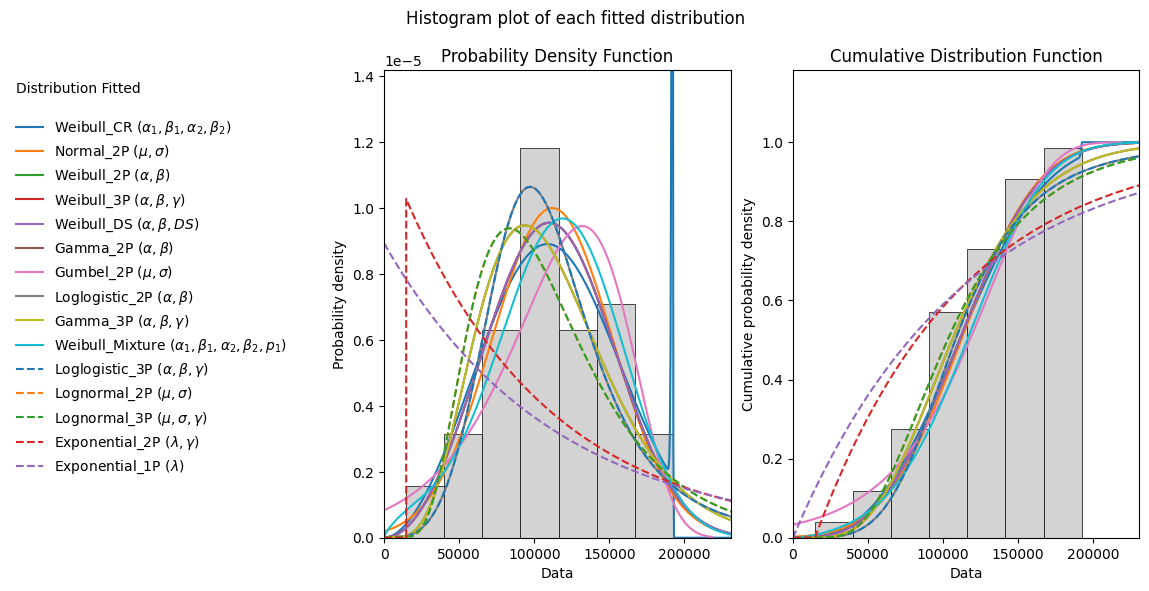

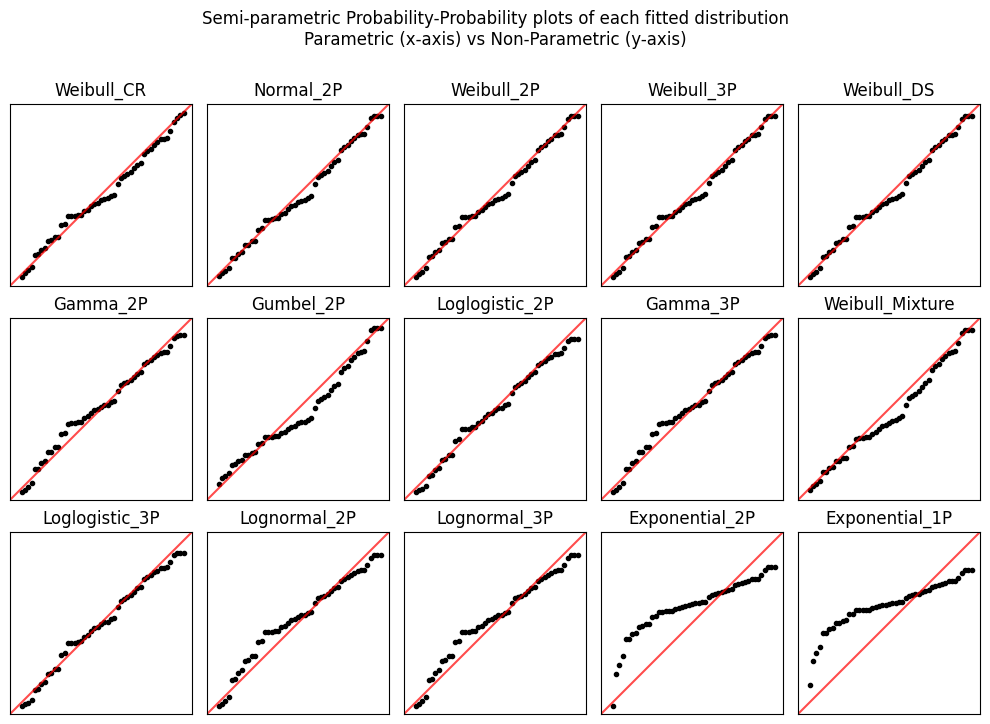

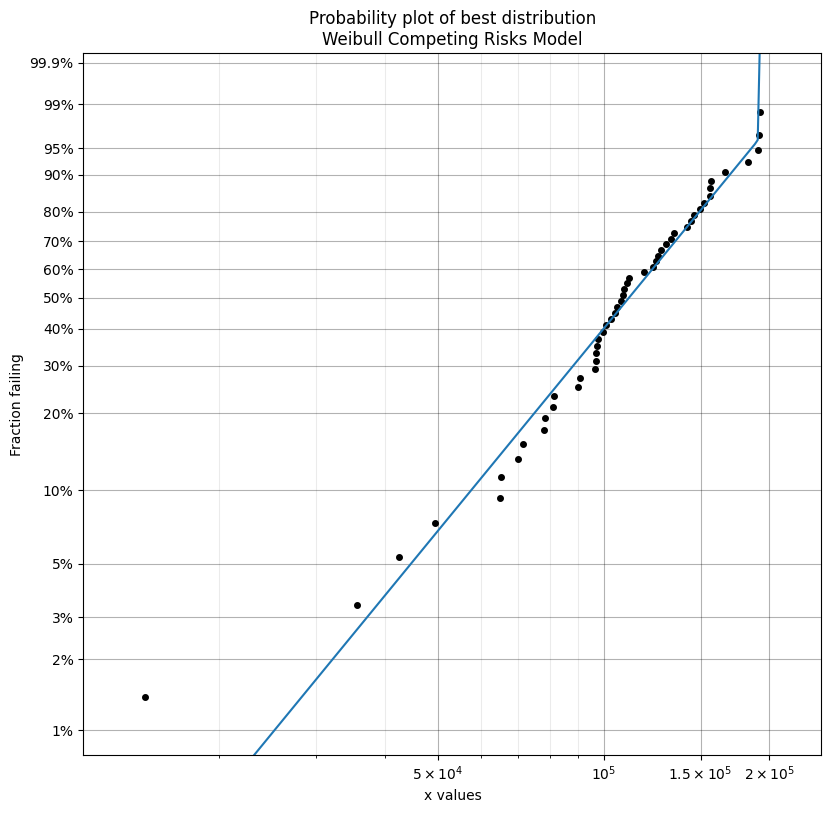

In [12]:
from reliability.Fitters import Fit_Everything

Fit_Everything(failures=profit,show_probability_plot=False)

Here, it appeared that the Normal distribution is the best model. Let's run this model only. 

Results from Fit_Normal_2P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 50/0 (0% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
       Mu          112013         5642.87    100953    123072
    Sigma         39901.1         3990.11   32799.3   48540.6 

Goodness of fit    Value
 Log-likelihood -600.655
           AICc  1205.57
            BIC  1209.13
             AD 0.507852 



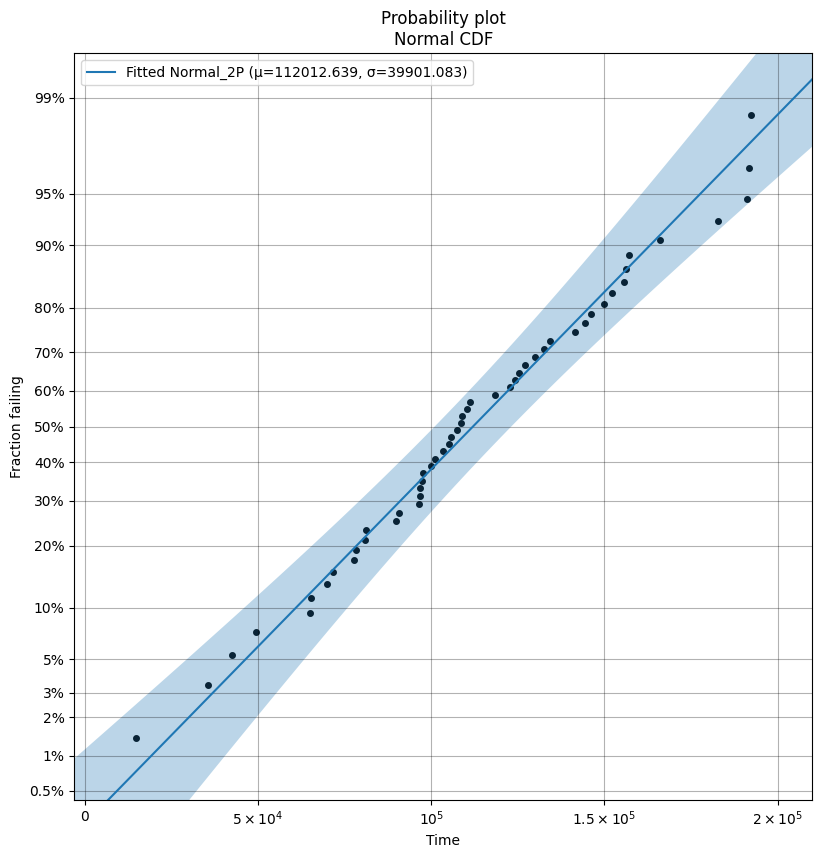

In [13]:
from reliability.Fitters import Fit_Normal_2P

Fit_Normal_2P(failures=profit,show_probability_plot=True)

Here for *normal* distribution the result is:
* log-likelihood = -600.655
* optimized parameter Mu = 112013
* optimized parameter Sigma = 39901.1